<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/BT_Fuzzy_DCmotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Điều khiển động cơ DC:
 - Độ ẩm
 - Nhiệt độ 
 - Lưu lượng
 - Mức
 + **Input**: Setpoint + Sensor 
 + **Output** : PWM( Động cơ DC)

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=24084a8c7105bb19b931b6c3a26b516627f34a1ee41b0228f6509cab031d5d96
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


159.59574959574974


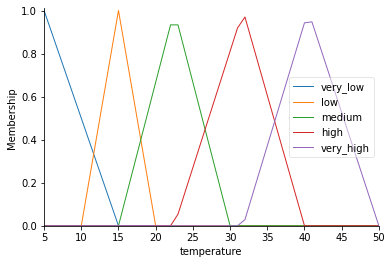

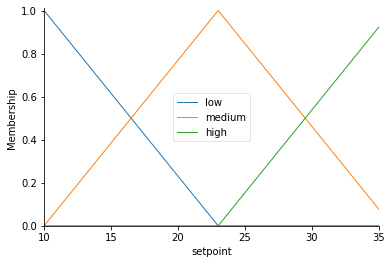

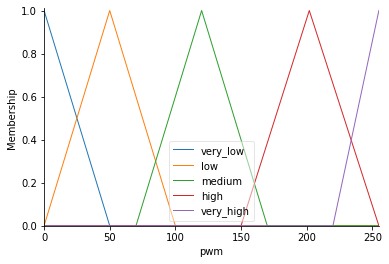

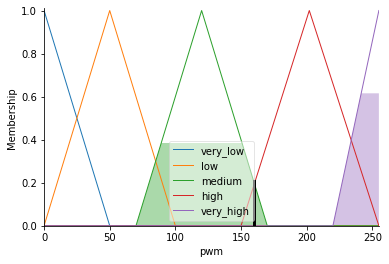

In [13]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

temperature = ctrl.Antecedent(np.arange(5,51,1),'temperature')
setpoint = ctrl.Antecedent(np.arange(10,36,1),'setpoint')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

temperature['very_low']= fuzz.trimf(temperature.universe,[5,5,15])
temperature['low']= fuzz.trimf(temperature.universe,[10,15,20])
temperature['medium']= fuzz.trimf(temperature.universe,[15,22.5,30])
temperature['high']= fuzz.trimf(temperature.universe,[22.5,31.75,40])
temperature['very_high']= fuzz.trimf(temperature.universe,[31.75,40.5,50])

setpoint['low']= fuzz.trimf(setpoint.universe,[10,10,23])
setpoint['medium']= fuzz.trimf(setpoint.universe,[10,23,36])
setpoint['high']= fuzz.trimf(setpoint.universe,[23,36,36])

pwm['very_low']= fuzz.trimf(pwm.universe,[0,0,50])
pwm['low']= fuzz.trimf(pwm.universe,[0,50,100])
pwm['medium']= fuzz.trimf(pwm.universe,[70,120,170])
pwm['high']= fuzz.trimf(pwm.universe,[150,202,255])
pwm['very_high']= fuzz.trimf(pwm.universe,[220,255,255])

temperature.view()
setpoint.view()
pwm.view()

rule1 = ctrl.Rule(temperature['very_low'] & setpoint['low'],pwm['very_low'])
rule2 = ctrl.Rule(temperature['low']      & setpoint['low'],pwm['low'])
rule3 = ctrl.Rule(temperature['medium']   & setpoint['low'],pwm['medium'])
rule4 = ctrl.Rule(temperature['high']     & setpoint['low'],pwm['high'])
rule5 = ctrl.Rule(temperature['very_high']& setpoint['low'],pwm['very_high'])

rule6 = ctrl.Rule(temperature['very_low'] & setpoint['medium'],pwm['low'])
rule7 = ctrl.Rule(temperature['low']      & setpoint['medium'],pwm['very_low'])
rule8 = ctrl.Rule(temperature['medium']   & setpoint['medium'],pwm['very_low'])
rule9 = ctrl.Rule(temperature['high']     & setpoint['medium'],pwm['low'])
rule10 = ctrl.Rule(temperature['very_high']& setpoint['medium'],pwm['medium'])

rule11 = ctrl.Rule(temperature['very_low'] & setpoint['high'],pwm['high'])
rule12 = ctrl.Rule(temperature['low']      & setpoint['high'],pwm['high'])
rule13 = ctrl.Rule(temperature['medium']   & setpoint['high'],pwm['medium'])
rule14 = ctrl.Rule(temperature['high']     & setpoint['high'],pwm['very_low'])
rule15 = ctrl.Rule(temperature['very_high']& setpoint['high'],pwm['low'])


pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming= ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['temperature']=40
pwming.input['setpoint']=15
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)
